In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# biblioteca do colab para deixar as tabelas mais organizadas e pesquisaveis
from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns


from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib as m
import sklearn as sk

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

In [ ]:
# Carrega os dados
baseDados= pd.read_csv('/content/drive/MyDrive/Ifes/Inteligência de Negócios/cirrhosis.csv', 
                             #names = nome_colunas, 
                             sep = ',', 
                             encoding = 'latin-1')

In [ ]:
# Vizualização do dataset
baseDados.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
# Troca os valors ? por valores NA
baseDados.replace('?', np.nan, inplace = True)
# Visualiza as primeiras linhas
baseDados.head(10)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [ ]:
baseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
# Foi utilizado 0 para feminio e 1 para masculino
# Fui utilizado 0 para não 1 para sim
baseDados['Sex']=pd.get_dummies(baseDados['Sex'])['M']
baseDados['Edema']=pd.get_dummies(baseDados['Edema'])['Y']
baseDados['Ascites']=pd.get_dummies(baseDados['Ascites'])['Y']
baseDados['Spiders']=pd.get_dummies(baseDados['Spiders'])['Y']
baseDados['Hepatomegaly']=pd.get_dummies(baseDados['Hepatomegaly'])['Y']

In [ ]:
#baseDados.drop(['Platelets'], axis = 1, inplace = True)
#baseDados.drop(['Albumin'], axis = 1, inplace = True)
#baseDados.drop(['N_Days'], axis = 1, inplace = True)
baseDados.drop(['ID'], axis = 1, inplace = True)
#baseDados.drop(['Cholesterol'], axis = 1, inplace = True)
#baseDados.drop(['Alk_Phos'], axis = 1, inplace = True)

In [ ]:
baseDados.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,0,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,1,0,0,0,0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,0,0,1,1,0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
# Informações sobre o dataset
baseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    uint8  
 5   Ascites        418 non-null    uint8  
 6   Hepatomegaly   418 non-null    uint8  
 7   Spiders        418 non-null    uint8  
 8   Edema          418 non-null    uint8  
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [ ]:
baseDados.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

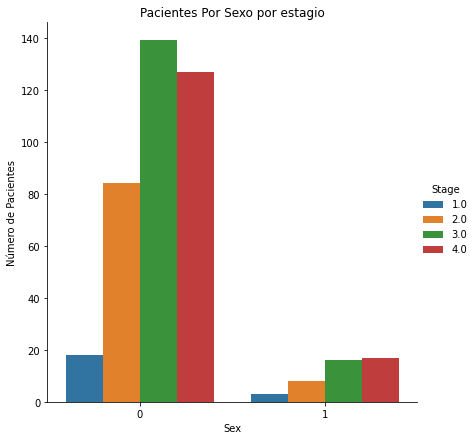

In [ ]:
# Como o número de doentes é afetado pelo sexo da pessoa.
# Como se pode observar os dados não estão balanceados por sexo logo o 
# algoritmo conhece mais os dados femininos

# Estagio 1: Normal
# Estágio 2: Fígado Gorduroso
# Estágio 3: Fibrose hepática
# Estágio 4: Cirrose hepática

mx = sns.catplot(x = "Sex", hue = 'Stage', data = baseDados, kind = "count", height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Sexo por estagio');

In [ ]:
# Função para transformar o status em numerico
# 0 - C
# 1 - D  
# 2 - Outro
def status_func(status):
    if status.values.item() == "C":
      return 0
    elif status.values.item() == "D":
      return 1
    else:
      return 2

# Aplica a função
baseDados['Status'] = baseDados[['Status']].apply(status_func, axis = 1)

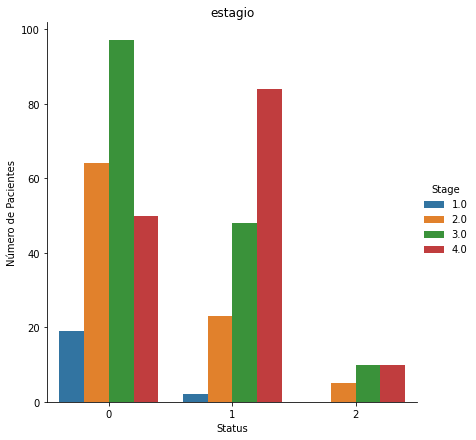

In [ ]:
mx = sns.catplot(x = "Status", hue = 'Stage', data = baseDados, kind = "count", height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('estagio');

In [ ]:
# Função para transformar o medicamento
# 0 - D-penicillamine
# 1 - Placebo
# 2 - Outro
def drug_func(status):
    if status.values.item() == "D-penicillamine":
      return 0
    elif status.values.item() == "Placebo":
      return 1
    else:
      return 2

# Aplica a função
baseDados['Drug'] = baseDados[['Drug']].apply(drug_func, axis = 1)

In [ ]:
baseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    int64  
 2   Drug           418 non-null    int64  
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    uint8  
 5   Ascites        418 non-null    uint8  
 6   Hepatomegaly   418 non-null    uint8  
 7   Spiders        418 non-null    uint8  
 8   Edema          418 non-null    uint8  
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [ ]:
baseDados["Age"] = (baseDados["Age"]//365)
baseDados["Age"] = baseDados["Age"].astype("int32")
baseDados['Age'].head()

0    58
1    56
2    70
3    54
4    38
Name: Age, dtype: int32

In [ ]:
baseDados.isnull().sum()

N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol        6
Albumin            0
Copper             0
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
FaixaEtaria        0
dtype: int64

In [ ]:
# Função para o preencher das linhas vazias com a media, pode ser colocado mediana, moda, qualquer dado estatistico
def impute_median(series):
    return series.fillna(series.median())

In [ ]:
# Como foi verificado nos resultados anteriores sem rodar esta linha de codigo temos muidos dados femininos
# e tambem temos varios dados nans aproximadamente de 25 a 30% caso fosse feita exclusão então iremos retirar
# os dados femininos que possuam valores Nans a fim de balancear as classes e depois sera feito preenchimento
# dos dados faltantes e sera retirado tambem valores outliers caso sejam feminios
((baseDados['Copper'] > baseDados['Copper'].mean())).value_counts()

False    312
True     106
Name: Copper, dtype: int64

In [ ]:
baseDados.Copper = baseDados['Copper'].transform(impute_median)

In [ ]:
baseDados.loc[(baseDados["Copper"] <= (baseDados["Copper"].mean())) & (baseDados["Sex"] == 0)]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
1,4500,0,0,56,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1925,1,0,54,0,0,1,1,0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,2503,1,1,66,0,0,1,0,0,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,1832,0,1,55,0,0,1,0,0,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,2466,1,1,53,0,0,0,0,0,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,1,2,67,0,0,0,0,0,1.2,NaN,2.96,73.0,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,0,2,39,0,0,0,0,0,0.9,NaN,3.83,73.0,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,0,2,57,0,0,0,0,0,1.6,NaN,3.42,73.0,NaN,NaN,NaN,143.0,9.9,3.0
416,691,0,2,58,0,0,0,0,0,0.8,NaN,3.75,73.0,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
baseDados.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,418.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,0.504785,0.875598,50.382775,0.105263,0.057416,0.382775,0.215311,0.047847,3.220813,369.510563,3.497440,91.279904,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,0.608671,0.785863,10.481084,0.307260,0.232915,0.486647,0.411530,0.213698,4.407506,231.944545,0.424972,74.485481,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,249.500000,3.242500,51.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,1.000000,2.000000,58.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.400000,400.000000,3.770000,100.750000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,2.000000,2.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
baseDados.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,0.504785,0.875598,50.382775,0.105263,0.057416,0.382775,0.215311,0.047847,3.220813,356.130383,3.497440,91.279904,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,0.608671,0.785863,10.481084,0.307260,0.232915,0.486647,0.411530,0.213698,4.407506,196.949190,0.424972,74.485481,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,257.500000,3.242500,51.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,0.000000,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,310.000000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,1.000000,2.000000,58.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.400000,394.000000,3.770000,100.750000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,2.000000,2.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
#Caso pegue a media:
#colesterol subiu de 284 para 412 
#Alk_phos subiu de 312 para 412
#SGOT subiu de 312 para 412
#Triglicerides de 282 para 412
#Seria interessante deletar alguns dados

In [ ]:
#deletar um pouco de dados do 2 3 e 4
print(baseDados.isnull().sum())
#quantidade de dados unicos
print(baseDados.nunique())

N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
FaixaEtaria        0
dtype: int64
N_Days           399
Status             3
Drug               3
Age               50
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              2
Bilirubin         98
Cholesterol      215
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
FaixaEtaria        5
dtype: int64


In [ ]:
# Checando a proporção por idade
# Criaremos colunas auxiliares para ajudar no trabalho de análise exploratória
baseDados['FaixaEtaria'] = np.where((baseDados['Age'] < 40) , 'G3',
                                 np.where((baseDados['Age'] >= 40) & (baseDados['Age'] <= 49), 'G4',
                                 np.where((baseDados['Age'] >= 50) & (baseDados['Age'] <= 59), 'G5',
                                 np.where((baseDados['Age'] >= 60) & (baseDados['Age'] <= 69), 'G6',
                                 'G7'))))

In [ ]:
baseDados['FaixaEtaria'].value_counts()

G5    134
G4    126
G6     76
G3     69
G7     13
Name: FaixaEtaria, dtype: int64

In [ ]:
baseDados['FaixaEtaria'].value_counts()

G5    134
G4    126
G6     76
G3     69
G7     13
Name: FaixaEtaria, dtype: int64

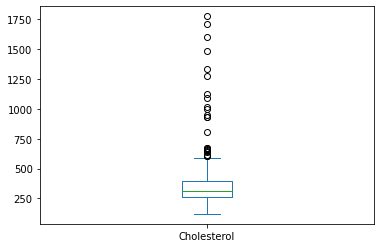

In [ ]:
#Verifica a distribuição do colesterol nos usuarios
baseDados.Cholesterol.plot.box();

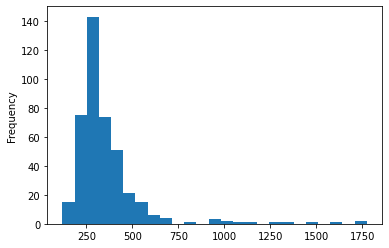

In [ ]:
baseDados.Cholesterol.plot.hist(bins=25);

In [ ]:
baseDados.groupby(['Age','Sex'])['Cholesterol'].transform('median')

0      280.0
1      256.5
2      176.0
3      262.0
4      279.0
       ...  
413    470.0
414    257.5
415    221.5
416    280.0
417    258.0
Name: Cholesterol, Length: 418, dtype: float64

In [ ]:
baseDados['Cholesterol'] = baseDados.Cholesterol.fillna(baseDados.groupby(['Age','Sex'])['Cholesterol'].transform('median'))

In [ ]:
baseDados.Cholesterol = baseDados['Cholesterol'].transform(impute_median)

In [ ]:
# Aplica a função
#baseDados.Cholesterol = baseDados['Cholesterol'].transform(impute_median)
baseDados.Alk_Phos = baseDados['Alk_Phos'].transform(impute_median)
baseDados.SGOT = baseDados['SGOT'].transform(impute_median)
baseDados.Tryglicerides = baseDados['Tryglicerides'].transform(impute_median)
baseDados.Platelets = baseDados['Platelets'].transform(impute_median)
baseDados.Prothrombin = baseDados['Prothrombin'].transform(impute_median)
baseDados.drop(baseDados[baseDados['Stage'].isnull()].index, inplace=True)

In [ ]:
baseDados['Age'].max()

78

In [ ]:
# Proporção por óbito causado pela doença
# Como verificado esta muito desbalanceado, verificar dentro desses dados quais
# possuem valores nan ou miss e deletar procurando balancear por baixo restando
# no maximo 84 dados
baseDados['Stage'].value_counts()

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

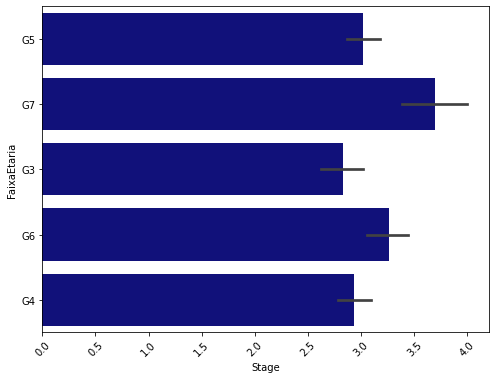

In [ ]:
# como podemos ver a faixa etaria influenciou no avanço da doença quanto mais velo mais avançada
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.barplot(data=baseDados, x='Stage', y='FaixaEtaria', color='DarkBlue')

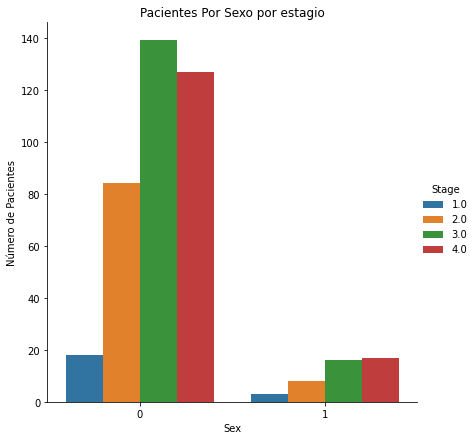

In [ ]:
# Como o número de doentes é afetado pelo sexo da pessoa.
# Como se pode observar os dados não estão balanceados por sexo logo o 
# algoritmo conhece mais os dados femininos

# Estagio 1: Normal
# Estágio 2: Fígado Gorduroso
# Estágio 3: Fibrose hepática
# Estágio 4: Cirrose hepática

mx = sns.catplot(x = "Sex", hue = 'Stage', data = baseDados, kind = "count", height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Sexo por estagio');

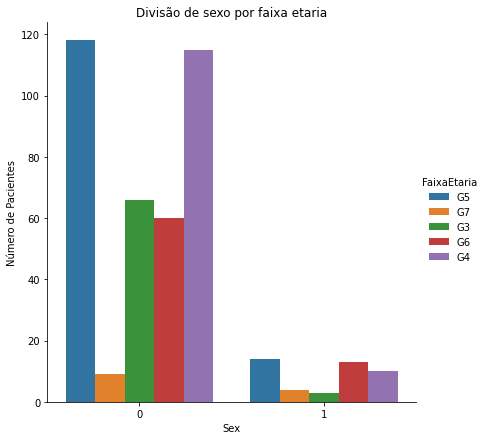

In [ ]:
# Como o número de doentes é afetado pelo sexo da pessoa.
# possuimos mais pacientes de 40 a 50 anos e do sexo feminino necessidade de balancear
mx = sns.catplot(x = "Sex", hue = 'FaixaEtaria', data = baseDados, kind = "count", height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('Divisão de sexo por faixa etaria');

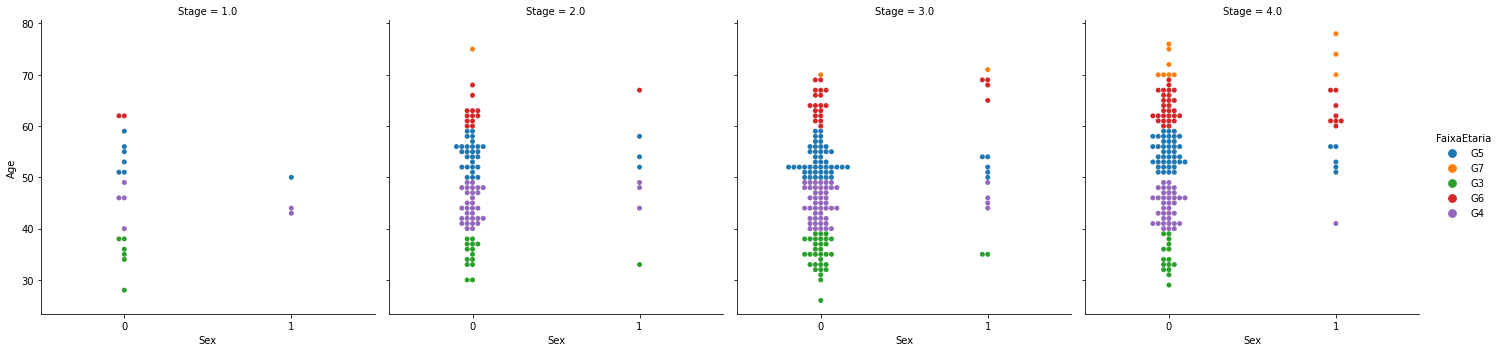

In [ ]:
# Se a bilirrubina é alta e o fígado é grande, há menos chances de sobrevivência
# Como se pode ver de todos estagios o estagio é o menos desbalanceado de todos
grafico = sns.catplot(x = "Sex", 
                      y = "Age", 
                      hue = "FaixaEtaria", 
                      col = "Stage",
                      data = baseDados, 
                      kind = "swarm")

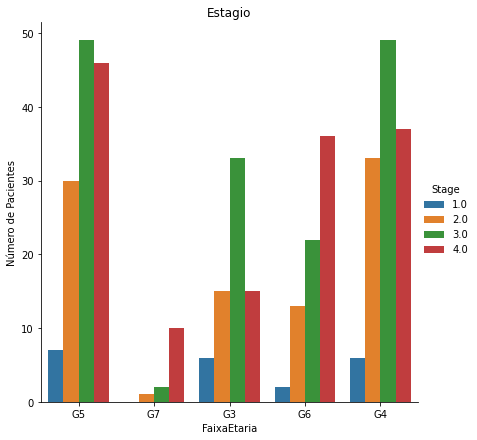

In [ ]:
# Como o número de doentes é afetado pelo sexo da pessoa.
mx = sns.catplot(x = "FaixaEtaria", hue = 'Stage', data = baseDados, kind = "count", height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('Estagio');

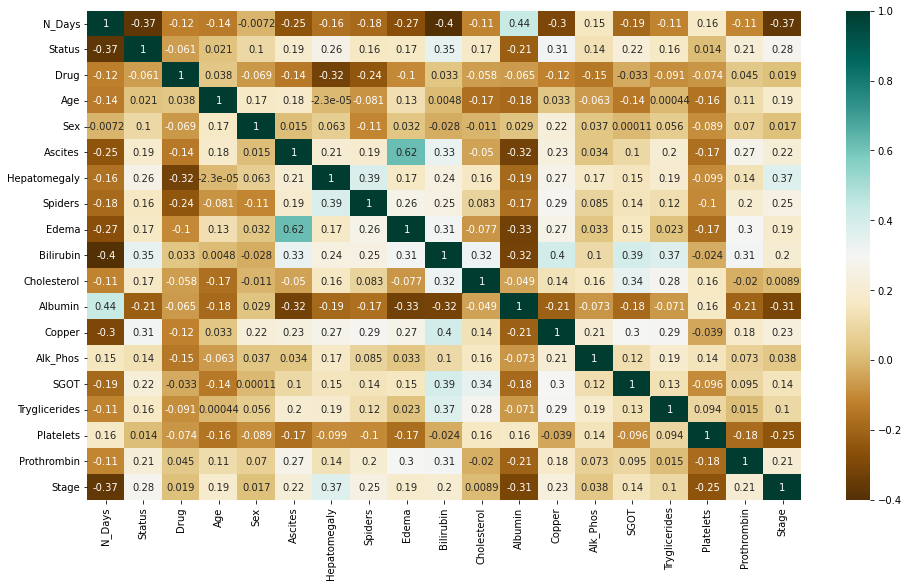

In [ ]:
# Correlação entre as variáveis
plt.figure(figsize = (16,9))
sns.heatmap(baseDados.corr(), cmap = "BrBG", annot = True)

In [ ]:
baseDados.drop(['FaixaEtaria'], axis = 1, inplace = True)

In [ ]:
# Gerando X e Y
print(np.shape(baseDados))
X = baseDados.drop(['Stage'], axis = 1)
print(np.shape(X))
y = baseDados.Stage# 1coluna
print(np.shape(y))
#X = np.asarray(X).astype(np.float32)
#y = np.asarray(y).astype(np.float32)

(412, 19)
(412, 18)
(412,)


4.0    155
3.0    155
2.0    155
1.0    155
Name: Stage, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
(620, 18)


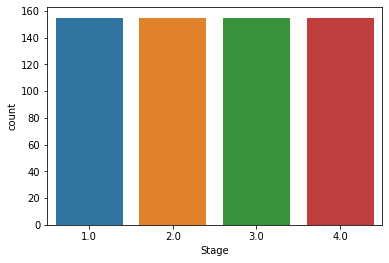

In [ ]:
# Tecnica de OverSampler para normalizar os dados
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)
# ver o balanceamento das classes
print(pd.Series(y).value_counts())
# plotar a nova distribuição de classes
print(sns.countplot(y));
print(np.shape(X))

In [ ]:
#X.join(y)

In [ ]:
#tanto Age,Sex,Hepatomegaly deram errado
#print(np.shape(baseDados))
#X = baseDados.drop(['Sex'], axis = 1)
#print(np.shape(X))
#y = baseDados.Sex# 1coluna
#print(np.shape(y))

In [ ]:
#ros = RandomOverSampler()
#X, y = ros.fit_resample(X, y)
# ver o balanceamento das classes
#print(pd.Series(y).value_counts())
# plotar a nova distribuição de classes
#print(sns.countplot(y));
#print(np.shape(X))
#X.join(y)

In [ ]:
from sklearn.model_selection import KFold
from sklearn import svm


In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [ ]:
kf = KFold(n_splits=5, random_state = 22, shuffle = True)
kf

KFold(n_splits=5, random_state=22, shuffle=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Começa aqui

In [ ]:
def get_Pred(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print("Acuracia: ", model.score(X_test, y_test)*100)
  return pred

In [ ]:
resultado_SVM = []
resultado_RF = []
resultado_KNN = []
mConfSVM = []
mConfRF = []
mConfKNN = []
n_neighbors = 10
for train_index, test_index in kf.split(X):
  #divisão dos dados
  X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

  #RESULTADO SVM
  print("KNN")
  resultado_KNN.append(get_Pred(KNeighborsClassifier(n_neighbors), X_train, X_test, y_train, y_test))
  mConfSVM.append(X_test)
  mConfSVM.append(y_test)

  #RESULTADO RANDOM FOREST
  print("RF")
  resultado_RF.append(get_Pred(RandomForestClassifier(n_estimators = 100), X_train, X_test, y_train, y_test))
  mConfRF.append(X_test)
  mConfRF.append(y_test)

  #RESULTADO KNN
  print("SVM")
  
  resultado_SVM.append(get_Pred(svm.SVC(), X_train, X_test, y_train, y_test))
  mConfKNN.append(X_test)
  mConfKNN.append(y_test)
  print("\n")

KNN
Acuracia:  47.58064516129033
RF
Acuracia:  72.58064516129032
SVM
Acuracia:  50.0


KNN
Acuracia:  50.806451612903224
RF
Acuracia:  68.54838709677419
SVM
Acuracia:  42.74193548387097


KNN
Acuracia:  53.2258064516129
RF
Acuracia:  73.38709677419355
SVM
Acuracia:  41.12903225806452


KNN
Acuracia:  51.61290322580645
RF
Acuracia:  68.54838709677419
SVM
Acuracia:  37.903225806451616


KNN
Acuracia:  54.03225806451613
RF
Acuracia:  76.61290322580645
SVM
Acuracia:  43.54838709677419




[[54 45 22 34]
 [28 58 24 45]
 [29 45 27 54]
 [27 45 38 45]]


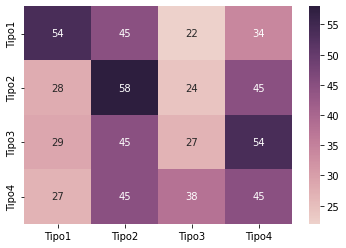

In [ ]:
#resultados de saida para as 5 redes neurais estudadas
A=[]
B=[]
conf=0
for i in range(len(resultado_SVM)):
  A.append(mConfSVM[i*2-1])
  B.append(resultado_SVM[i])
for i in range(len(A)):
  conf += metrics.confusion_matrix(A[i],B[i])
print(conf)
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(conf, cmap = cmap, xticklabels = ['Tipo1','Tipo2','Tipo3','Tipo4'], yticklabels = ['Tipo1','Tipo2','Tipo3','Tipo4'], annot = True)
#como plotar um de cada para isso eu precisaria pegar os resultados dos testes de cada um assim como as predições e guardar em uma matriz depois rodar essa matriz

[[104  22  13  16]
 [ 21  66  30  38]
 [ 20  33  49  53]
 [ 16  40  44  55]]


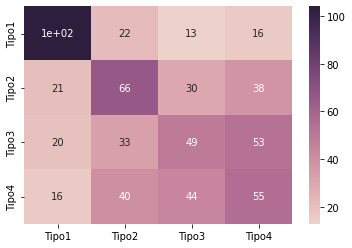

In [ ]:
#resultados de saida para as 5 redes neurais estudadas
A=[]
B=[]
conf=0
for i in range(len(resultado_RF)):
  A.append(mConfRF[i*2-1])
  B.append(resultado_RF[i])
for i in range(len(A)):
  conf += metrics.confusion_matrix(A[i],B[i])
print(conf)
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(conf, cmap = cmap, xticklabels = ['Tipo1','Tipo2','Tipo3','Tipo4'], yticklabels = ['Tipo1','Tipo2','Tipo3','Tipo4'], annot = True)
#como plotar um de cada para isso eu precisaria pegar os resultados dos testes de cada um assim como as predições e guardar em uma matriz depois rodar essa matriz

[[111  20  12  12]
 [ 54  49  26  26]
 [ 49  35  36  35]
 [ 47  45  36  27]]


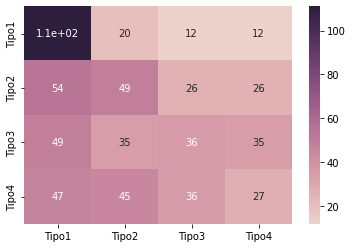

In [ ]:
#resultados de saida para as 5 redes neurais estudadas
A=[]
B=[]
conf=0
for i in range(len(resultado_KNN)):
  A.append(mConfKNN[i*2-1])
  B.append(resultado_KNN[i])
for i in range(len(A)):
  conf += metrics.confusion_matrix(A[i],B[i])
print(conf)
cmap = sns.cubehelix_palette(as_cmap = True)
sns.heatmap(conf, cmap = cmap, xticklabels = ['Tipo1','Tipo2','Tipo3','Tipo4'], yticklabels = ['Tipo1','Tipo2','Tipo3','Tipo4'], annot = True)
#como plotar um de cada para isso eu precisaria pegar os resultados dos testes de cada um assim como as predições e guardar em uma matriz depois rodar essa matriz